In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("Training_BOP.csv")
test = pd.read_csv("Testing_BOP.csv")

C:\Users\vedant.kulkarni\AppData\Local\Temp\ipykernel_15440\231216517.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("Training_BOP.csv")
C:\Users\vedant.kulkarni\AppData\Local\Temp\ipykernel_15440\231216517.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("Testing_BOP.csv")


In [4]:
train.shape

(1687861, 23)

In [5]:
test.shape

(242076, 23)

In [6]:
final = pd.concat([train,test])

In [7]:
final.shape

(1929937, 23)

In [12]:
115619/1929937

0.05990817316834694

In [8]:
final.isnull().sum()

sku                       0
national_inv              2
lead_time            115619
in_transit_qty            2
forecast_3_month          2
forecast_6_month          2
forecast_9_month          2
sales_1_month             2
sales_3_month             2
sales_6_month             2
sales_9_month             2
min_bank                  2
potential_issue           2
pieces_past_due           2
perf_6_month_avg          2
perf_12_month_avg         2
local_bo_qty              2
deck_risk                 2
oe_constraint             2
ppap_risk                 2
stop_auto_buy             2
rev_stop                  2
went_on_backorder         2
dtype: int64

In [9]:
df = final[final['lead_time'].isna()]

In [10]:
df["went_on_backorder"].value_counts()

No     115209
Yes       408
Name: went_on_backorder, dtype: int64

In [12]:
final["went_on_backorder"].value_counts()

No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64

In [13]:
408/13981

0.029182461912595666

In [23]:
# ANOVA test for target and lead_time variable

ColumnNames=['lead_time','went_on_backorder']
DataValues=final[final['lead_time'].notnull()]
DataValues= DataValues[['lead_time','went_on_backorder']]
#Create the Data Frame
df_anova=pd.DataFrame(data=DataValues,columns=ColumnNames)
print(df_anova.head())

from scipy.stats import f_oneway

CategoryGroupLists=df_anova.groupby('went_on_backorder')['lead_time'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

   lead_time went_on_backorder
1        9.0                No
3        8.0                No
5        8.0                No
7        2.0                No
9        8.0                No
P-Value for Anova is:  6.343677624605368e-141


As we are getting almost 0 pvalue but data is imbalanced so will drop lead_time column will see later about add or not

In [24]:
df_final=final.drop('lead_time', axis=1)
df_final

,sku,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [25]:
df_final.isna().sum()

sku                  0
national_inv         2
in_transit_qty       2
forecast_3_month     2
forecast_6_month     2
forecast_9_month     2
sales_1_month        2
sales_3_month        2
sales_6_month        2
sales_9_month        2
min_bank             2
potential_issue      2
pieces_past_due      2
perf_6_month_avg     2
perf_12_month_avg    2
local_bo_qty         2
deck_risk            2
oe_constraint        2
ppap_risk            2
stop_auto_buy        2
rev_stop             2
went_on_backorder    2
dtype: int64

As we can see value of null rows are very less hence we will drop it

In [28]:
df_final.shape

(1929937, 22)

In [33]:
# For removing all null values

cols=df_final.columns
for col in cols:
    df_final=df_final[df_final[col].notnull()]
    print(col, "is", df_final.shape)

sku is (1929935, 22)
national_inv is (1929935, 22)
in_transit_qty is (1929935, 22)
forecast_3_month is (1929935, 22)
forecast_6_month is (1929935, 22)
forecast_9_month is (1929935, 22)
sales_1_month is (1929935, 22)
sales_3_month is (1929935, 22)
sales_6_month is (1929935, 22)
sales_9_month is (1929935, 22)
min_bank is (1929935, 22)
potential_issue is (1929935, 22)
pieces_past_due is (1929935, 22)
perf_6_month_avg is (1929935, 22)
perf_12_month_avg is (1929935, 22)
local_bo_qty is (1929935, 22)
deck_risk is (1929935, 22)
oe_constraint is (1929935, 22)
ppap_risk is (1929935, 22)
stop_auto_buy is (1929935, 22)
rev_stop is (1929935, 22)
went_on_backorder is (1929935, 22)


In [34]:
df_final.isna().sum()

sku                  0
national_inv         0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [36]:
df_final.skew()

C:\Users\vedant.kulkarni\AppData\Local\Temp\ipykernel_15440\3993939959.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final.skew()


sku                    0.221200
national_inv         340.220722
in_transit_qty       168.980074
forecast_3_month     142.782763
forecast_6_month     138.817975
forecast_9_month     142.683706
sales_1_month        193.720023
sales_3_month        141.813979
sales_6_month        138.927012
sales_9_month        135.435699
min_bank             130.962612
pieces_past_due      414.269992
perf_6_month_avg      -3.173341
perf_12_month_avg     -3.295184
local_bo_qty         149.620918
dtype: float64

In [38]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1929935.0,496.568259,29573.434344,-27256.0,4.00,15.00,80.00,12334404.0
in_transit_qty,1929935.0,43.064397,1295.420493,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1929935.0,178.539864,5108.770174,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,1929935.0,345.465893,9831.562085,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1929935.0,506.606748,14345.430866,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1929935.0,55.368164,1884.377009,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1929935.0,174.663858,5188.855851,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1929935.0,341.565349,9585.030376,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1929935.0,523.577094,14733.265629,0.0,0.00,4.00,47.00,3205172.0
min_bank,1929935.0,52.776366,1257.968257,0.0,0.00,0.00,3.00,313319.0


It seems data is skewed

In [43]:
df_num=df_final.select_dtypes(include='number')
df_cat=df_final.select_dtypes(exclude='number')

In [45]:
print(df_num.dtypes)
print()
print(df_cat.dtypes)

national_inv         float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
dtype: object

sku                  object
potential_issue      object
deck_risk            object
oe_constraint        object
ppap_risk            object
stop_auto_buy        object
rev_stop             object
went_on_backorder    object
dtype: object


In [49]:
corr=df_num.corr()
corr

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.098473,0.080034,0.081328,0.080423,0.155753,0.191604,0.224305,0.239924,0.405298,0.030307,-0.013742,-0.010686,0.012814
in_transit_qty,0.098473,1.000000,0.638241,0.667614,0.661650,0.622062,0.687824,0.676524,0.645470,0.742187,0.161349,0.003169,0.004246,0.063223
forecast_3_month,0.080034,0.638241,1.000000,0.988112,0.971443,0.688490,0.764681,0.817126,0.809634,0.719626,0.359632,0.008378,0.008613,0.043872
forecast_6_month,0.081328,0.667614,0.988112,1.000000,0.994281,0.709730,0.799705,0.858822,0.852034,0.736929,0.367494,0.008346,0.008501,0.044063
forecast_9_month,0.080423,0.661650,0.971443,0.994281,1.000000,0.725149,0.823402,0.885969,0.879327,0.735548,0.373258,0.008348,0.008464,0.044010
sales_1_month,0.155753,0.622062,0.688490,0.709730,0.725149,1.000000,0.918282,0.873111,0.824634,0.769847,0.260607,0.001037,0.002315,0.065749
sales_3_month,0.191604,0.687824,0.764681,0.799705,0.823402,0.918282,1.000000,0.975437,0.930531,0.854285,0.314536,0.001371,0.002769,0.068080
sales_6_month,0.224305,0.676524,0.817126,0.858822,0.885969,0.873111,0.975437,1.000000,0.973871,0.838836,0.334398,0.002761,0.004148,0.056219
sales_9_month,0.239924,0.645470,0.809634,0.852034,0.879327,0.824634,0.930531,0.973871,1.000000,0.804336,0.329906,0.003325,0.004704,0.048616
min_bank,0.405298,0.742187,0.719626,0.736929,0.735548,0.769847,0.854285,0.838836,0.804336,1.000000,0.262834,-0.002576,0.000397,0.071582


<AxesSubplot:>

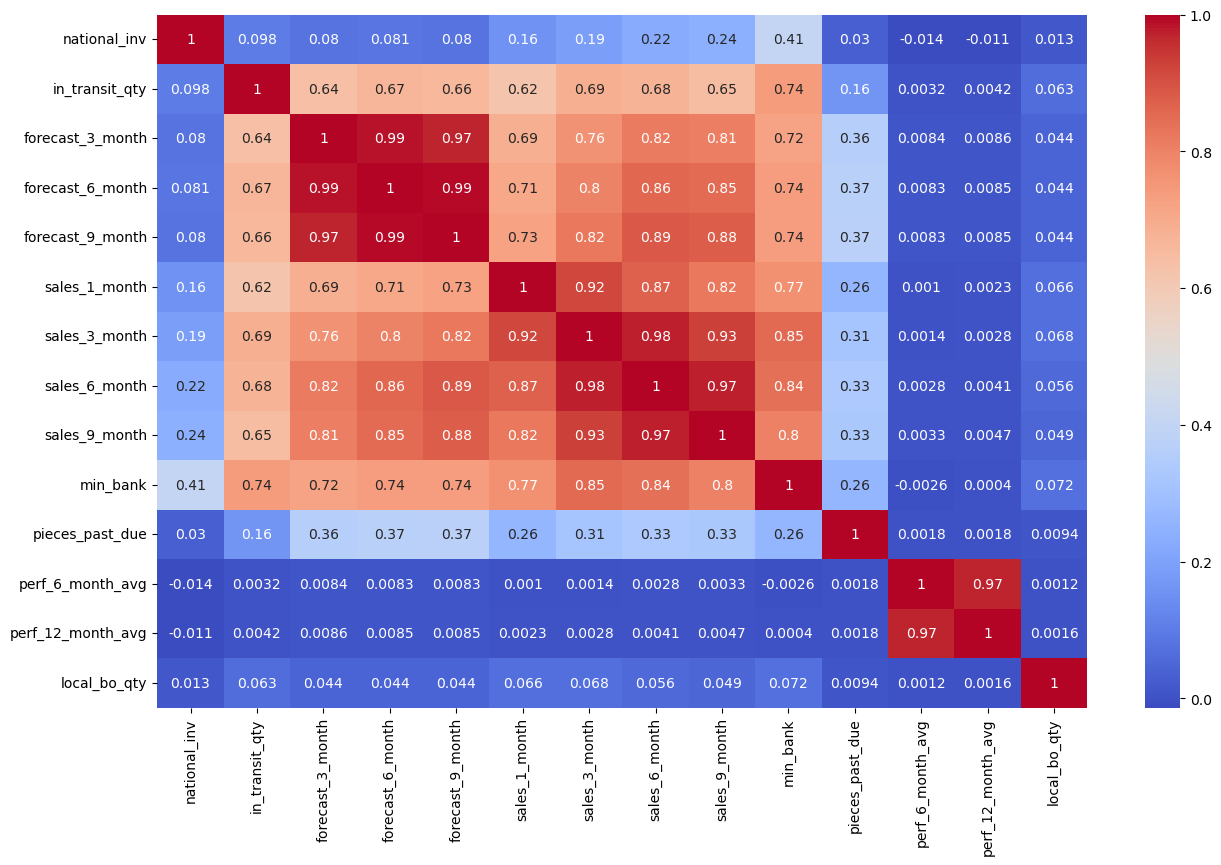

In [58]:

fig, ax = plt.subplots(figsize=(15, 9))

#create seaborn heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [64]:
df_cat.drop('sku', axis=1, inplace=True)
cols=df_cat.columns

for col in cols:
    print(df_cat[col].value_counts())

No     1928946
Yes        989
Name: potential_issue, dtype: int64
No     1494482
Yes     435453
Name: deck_risk, dtype: int64
No     1929643
Yes        292
Name: oe_constraint, dtype: int64
No     1697383
Yes     232552
Name: ppap_risk, dtype: int64
Yes    1859391
No       70544
Name: stop_auto_buy, dtype: int64
No     1929096
Yes        839
Name: rev_stop, dtype: int64
No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

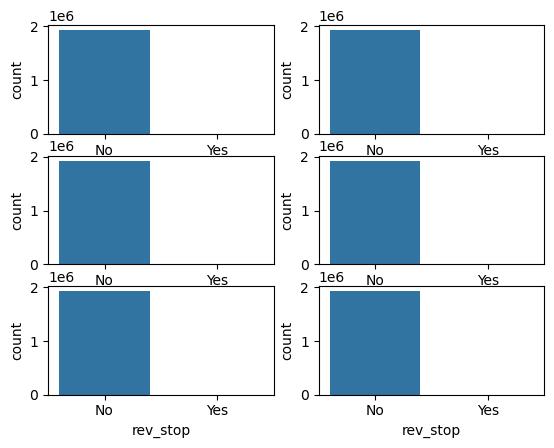

In [70]:
fig, ax=plt.subplots(3,2)
count=0
for i in range(3):
    for j in range(2):
        
        sns.countplot(df_cat['rev_stop'], ax=ax[i][j])

In [69]:
count=2
s=df_cat.iloc[:,count:count+1]
s

,oe_constraint
0,No
1,No
2,No
3,No
4,No
...,...
242070,No
242071,No
242072,No
242073,No
